In [1]:
from sklearn import datasets, cluster, metrics
from sklearn.preprocessing import scale
from sklearn import decomposition
from plotly.subplots import make_subplots
from scipy.stats import mode
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time as time

In [2]:
data = datasets.load_digits()
n = 0
m = 0
for x in data.data:
  for y in x:
    if y == 0:
      n += 1
    else:
      m += 1
print ("There are ", n, " 0s, and ", m, " not 0s.")

There are  56272  0s, and  58736  not 0s.


# **DATASET: Digits**

In [3]:
digits_data = datasets.load_digits()
X_digits = scale(digits_data.data)
y_digits = digits_data.target
pca_digits = decomposition.TruncatedSVD(n_components=40)
new_digits_data = pca_digits.fit(X_digits).transform(X_digits)
print (pca_digits.explained_variance_ratio_, sum(pca_digits.explained_variance_ratio_))

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057646
 0.00975316 0.00944558 0.00863014 0.00836642 0.00797691 0.00746471
 0.00725582 0.00691905 0.00653904 0.00640792 0.00591379 0.00571158
 0.00523616 0.00481729 0.0045367  0.00423037] 0.9507761249577396


# **Explained variance**

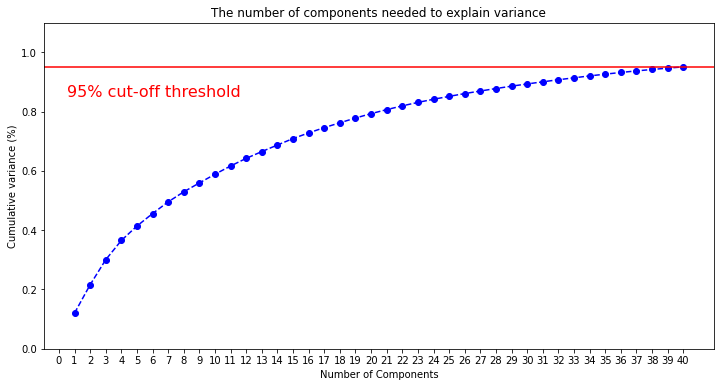

In [4]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, len(pca_digits.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca_digits.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(pca_digits.explained_variance_ratio_)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# **Reconstruction error**

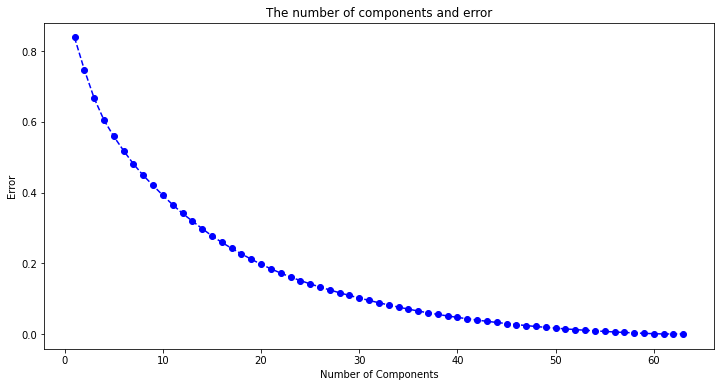

In [5]:
r = list(range(1,64))
loss = []
for i in r:
  pca = decomposition.TruncatedSVD(n_components=i)
  l = pca.fit_transform(X_digits)
  m = pca.inverse_transform(l)
  loss.append(((X_digits - m)**2).mean())
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')  
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--digits**

In [6]:
digits_kmean = cluster.KMeans(n_clusters=10, max_iter=200)
digits_clusters = digits_kmean.fit_predict(new_digits_data)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.6227045075125208


# **EM--digits**

In [7]:
digits_EM = GaussianMixture(n_components=10, max_iter=200)
digits_clusters = digits_EM.fit_predict(new_digits_data)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.5948803561491375


# **NN--digits**

In [8]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      0.95      0.98        66
           2       0.94      1.00      0.97        44
           3       0.97      0.97      0.97        58
           4       1.00      0.98      0.99        51
           5       0.98      0.98      0.98        64
           6       0.98      0.98      0.98        55
           7       0.98      0.98      0.98        60
           8       0.96      0.96      0.96        55
           9       0.94      0.96      0.95        69

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594

0.9764309764309764
--- 2.386908769607544 seconds ---


# **NN--digits--TruncatedSVD**

In [9]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_digits_data, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.88      1.00      0.93        57
           2       0.98      0.98      0.98        62
           3       0.96      0.98      0.97        56
           4       1.00      0.98      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      0.98      0.99        55
           7       0.98      0.98      0.98        54
           8       0.93      0.87      0.90        62
           9       0.96      0.92      0.94        59

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.968013468013468
--- 2.16475772857666 seconds ---


# **NN--digits--clusters--data**

In [10]:
u = np.concatenate((X_digits, digits_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       0.96      0.98      0.97        53
           2       0.98      0.98      0.98        48
           3       0.97      0.97      0.97        65
           4       1.00      0.95      0.98        65
           5       0.97      0.96      0.96        71
           6       0.99      0.97      0.98        71
           7       0.97      1.00      0.98        60
           8       0.93      0.93      0.93        57
           9       0.96      0.96      0.96        54

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.9696969696969697
--- 2.094395399093628 seconds ---


# **NN--digits--clusters**

In [11]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(digits_clusters.reshape(-1, 1), y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83        58
           1       0.00      0.00      0.00        59
           2       0.28      0.67      0.40        55
           3       0.36      0.93      0.52        59
           4       0.00      0.00      0.00        57
           5       0.88      0.61      0.72        61
           6       0.99      0.97      0.98        68
           7       0.39      0.88      0.54        48
           8       0.00      0.00      0.00        60
           9       0.00      0.00      0.00        69

    accuracy                           0.50       594
   macro avg       0.36      0.51      0.40       594
weighted avg       0.37      0.50      0.40       594

0.49663299663299665
--- 2.8886420726776123 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **DATASET: Wine**

In [12]:
wine_data = datasets.load_wine()
X_wine = scale(wine_data.data)
y_wine = wine_data.target
pca_wine = decomposition.TruncatedSVD(n_components=10)
new_wine_data = pca_wine.fit(X_wine).transform(X_wine)
print (pca_wine.explained_variance_ratio_, sum(pca_wine.explained_variance_ratio_))

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019] 0.961697168445064


# **Explained variance**

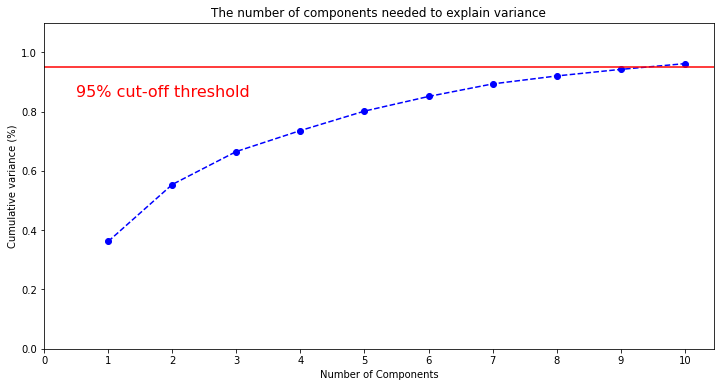

In [13]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, len(pca_wine.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca_wine.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(pca_wine.explained_variance_ratio_)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# **Reconstruction error**

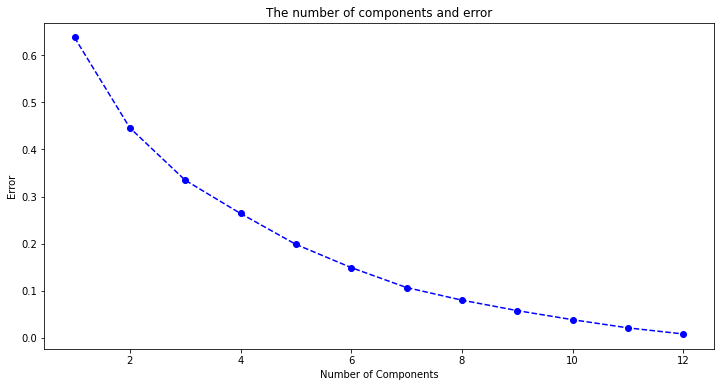

In [14]:
r = list(range(1,13))
loss = []
for i in r:
  pca = decomposition.PCA(n_components=i)
  l = pca.fit_transform(X_wine)
  m = pca.inverse_transform(l)
  loss.append(((X_wine - m)**2).mean())  
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--wine**

In [15]:
wine_kmean = cluster.KMeans(n_clusters=3, max_iter=200)
wine_clusters = wine_kmean.fit_predict(new_wine_data)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9662921348314607


# **EM--wine**

In [16]:
wine_EM = GaussianMixture(n_components=3, max_iter=200)
wine_clusters = wine_EM.fit_predict(new_wine_data)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9550561797752809


# **NN--wine**

In [17]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.95      0.90      0.92        20
           2       1.00      0.94      0.97        18

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

0.9491525423728814
--- 0.23569583892822266 seconds ---


# **NN--wine--TruncatedSVD**

In [18]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_wine_data, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        14

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

1.0
--- 0.2651848793029785 seconds ---


# **NN--wine--clusters--data**

In [19]:
u = np.concatenate((X_wine, wine_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        18

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

0.9830508474576272
--- 0.20338058471679688 seconds ---


# **NN--wine--clusters**

In [20]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(wine_clusters.reshape(-1, 1), y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.90      0.95        20
           2       0.93      1.00      0.97        14

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.96        59
weighted avg       0.97      0.97      0.97        59

0.9661016949152542
--- 0.31133246421813965 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

